# <font color=blue>Assignments for "Making Predictions"</font>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house = house_prices_df.drop(['Id','PoolQC','MiscFeature', 'Alley','Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<300000)].index)
house = house.drop(house[(house["TotalBsmtSF"]>6000) & (house["SalePrice"]<200000)].index)
house = house.drop(house[(house["TotRmsAbvGrd"]>12) & (house["SalePrice"]<250000)].index)

In [4]:
house['PoolArea'] = pd.get_dummies(house['PoolArea'],drop_first=True)
house['GarageArea'] = pd.get_dummies(house['GarageArea'],drop_first=True)
house['TotalBsmtSF'] = pd.get_dummies(house['TotalBsmtSF'],drop_first=True)
house['2ndFlrSF'] = pd.get_dummies(house['2ndFlrSF'],drop_first=True)
house['Fireplaces'] = pd.get_dummies(house['Fireplaces'],drop_first=True)

In [5]:
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['YearBuilt'])
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].mean())

In [6]:
house['SalePrice'] = np.log(house['SalePrice'])

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_feature_mask = house.dtypes==object
categorical_cols = house.columns[categorical_feature_mask].tolist()
labelencoder = LabelEncoder()
house[categorical_cols] = house[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [8]:
X = house[['OverallQual','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea']]

Y = house['SalePrice']

- Split your data into train and test sets.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)

X_train = sm.add_constant(X_train)

- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [10]:
results = sm.OLS(Y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     606.8
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:35:44   Log-Likelihood:                 306.52
No. Observations:                1165   AIC:                            -597.0
Df Residuals:                    1157   BIC:                            -556.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2184      0.698      6.047      0.000       2.850       5.587
OverallQual      0.1353      0.006     23.126      0.000       0.124       0.147
YearBuilt        0.0024      0.000      6.955      0.000       0.002       0.003
YearRemodAdd     0.0021      0.000      5.872      0.000       0.001       0.003
TotRmsAbvGrd     0.0580      0.004     14.603      0.000       0.050       0.066
GarageYrBlt     -0.0012      0.000     -2.905      0.004      -0.002      -0.000
GarageCars       0.1248      0.010     12.084      0.000       0.105       0.145
GarageArea      -0.2336      0.133     -1.761      0.078      -0.494       0.027
==============================================================================
Omnibus:                       66.400   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.451
Skew:                          -0.319   Prob(JB):                     3.92e-35
Kurtosis:                       4.690   Cond. No.                     4.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.

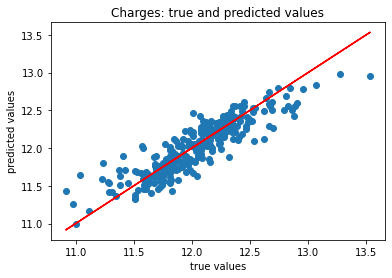




Mean absolute error of the prediction is: 0.13910041786124888
Mean squared error of the prediction is: 0.032782594501951375
Root mean squared error of the prediction is: 0.1810596434933842
Mean absolute percentage error of the prediction is: 1.1571839778478692


In [11]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(Y_test, y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print('\n\n')
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))


- Is the performance of your model satisfactory? Why?

As a result of the visualization, I can say that the model is quite satisfactory. R-squared result is 0.786, which we can say is quite good.

In addition, the results of error metrics are also satisfactory.

When we look at the plot, we can also see that the blue dots sit quite above the red line.

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [12]:
house['has_pool'] = house['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house['has_garage'] = house['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house['has_bsmt'] = house['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house['has_2ndfloor'] = house['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house['has_fireplace'] = house['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
Y = house['SalePrice']
X = house.drop('SalePrice', axis=1)

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     193.4
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:35:44   Log-Likelihood:                 935.70
No. Observations:                1165   AIC:                            -1725.
Df Residuals:                    1092   BIC:                            -1356.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.3288      5.291      3.842      0.000       9.947      30.710
MSSubClass       -0.0002      0.000     -1.093      0.275      -0.001       0.000
MSZoning         -0.0147      0.006     -2.521      0.012      -0.026      -0.003
LotArea        2.584e-06   4.02e-07      6.424      0.000    1.79e-06    3.37e-06
Street            0.2078      0.050      4.175      0.000       0.110       0.305
LotShape         -0.0028      0.003     -1.077      0.282      -0.008       0.002
LandContour      -0.0071      0.005     -1.304      0.192      -0.018       0.004
Utilities        -0.1167      0.119     -0.984      0.325      -0.349       0.116
LotConfig        -0.0024      0.002     -1.077      0.282      -0.007       0.002
LandSlope         0.0003      0.015      0.021      0.983      -0.030       0.030
Neighborhood     -0.0003      0.001     -0.427      0.669      -0.001       0.001
Condition1        0.0028      0.004      0.699      0.485      -0.005       0.011
Condition2       -0.0074      0.014     -0.537      0.591      -0.035       0.020
BldgType         -0.0111      0.006     -1.965      0.050      -0.022   -1.61e-05
HouseStyle        0.0042      0.003      1.625      0.104      -0.001       0.009
OverallQual       0.0669      0.005     14.326      0.000       0.058       0.076
OverallCond       0.0399      0.004      9.803      0.000       0.032       0.048
YearBuilt         0.0018      0.000      5.481      0.000       0.001       0.002
YearRemodAdd      0.0005      0.000      2.051      0.040    2.31e-05       0.001
RoofStyle        -0.0015      0.004     -0.346      0.729      -0.010       0.007
RoofMatl         -0.0150      0.006     -2.566      0.010      -0.026      -0.004
Exterior1st      -0.0028      0.002     -1.269      0.205      -0.007       0.002
Exterior2nd       0.0030      0.002      1.552      0.121      -0.001       0.007
MasVnrType        0.0149      0.006      2.457      0.014       0.003       0.027
MasVnrArea     3.356e-05   2.44e-05      1.378      0.169   -1.42e-05    8.13e-05
ExterQual        -0.0106      0.008     -1.377      0.169      -0.026       0.005
ExterCond         0.0090      0.005      1.755      0.079      -0.001       0.019
Foundation        0.0142      0.007      2.092      0.037       0.001       0.027
BsmtQual         -0.0103      0.006     -1.833      0.067      -0.021       0.001
BsmtCond          0.0109      0.005      2.072      0.038       0.001       0.021
BsmtExposure     -0.0055      0.004     -1.551      0.121      -0.013       0.001
BsmtFinType1     -0.0038      0.002     -1.524      0.128      -0.009       0.001
BsmtFinSF1        0.0002   2.07e-05      7.538      0.000       0.000       0.000
BsmtFinType2      0.0028      0.005      0.519      0.604      -0.008       0.013
BsmtFinSF2        0.0001   3.57e-05      3.380   

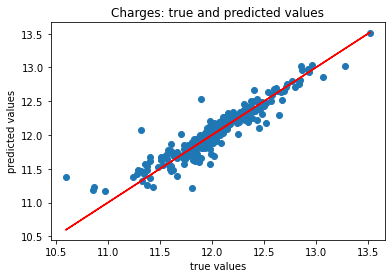




Mean absolute error of the prediction is: 0.09315295665991301
Mean squared error of the prediction is: 0.01940969944230073
Root mean squared error of the prediction is: 0.13931869738947722
Mean absolute percentage error of the prediction is: 0.782576649030863


In [14]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(Y_test, y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()
print('\n\n')
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds) / Y_test)) * 100))

When compare two models both R-squared and adjusted R-squared increase in the second model. Also, the second model has better values from first one with respect to all of the four metrics MAE, MSE, RMSE, MAPE.Compared to the previous model, this second model seems to predict high values of the target better. It also seems that the second model predicts the lower values better because the points are more tightly clustered around the red line.